## Data Preprocessing

### Import packages and CV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)
# Create Dataframe
# Print shape of dataset


In [2]:
df=pd.read_csv("Visadataset (1).csv")

In [3]:
print(df.shape)

(25480, 12)


## Data Cleaning

### Handling Missing values

* Handling Missing values 
* Handling Duplicates
* Check data type
* Understand the dataset

## Check for null values

In [4]:
feature_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for features in feature_with_na:
    print(features,np.round(df[features].isnull().mean()*100,5),)


In [5]:
df.duplicated().sum()

0

In [6]:
from datetime import date

todays_date=date.today()
current_year=todays_date.year

df['company_age']=current_year-df['yr_of_estab']

In [7]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,17
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,22
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,16
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,127
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,19


In [8]:
df.drop(columns=['yr_of_estab'],inplace=True)

In [9]:
num_features=[feature for feature in df.columns if df[feature].dtype!='O']
print("Num of  numerical  feature :" ,len(num_features))

Num of  numerical  feature : 3


In [10]:
cat_features=[features for features in df.columns if df[features].dtype=='O' ]
print("Num of categorical features :",len(cat_features))

Num of categorical features : 9


In [11]:
discrete_features=[features for  features in num_features if df[features].nunique()<=25 ]

In [12]:
continuous_features=[features for features in num_features if features not in discrete_features]
continuous_features

['no_of_employees', 'prevailing_wage', 'company_age']

## Split X and Y

In [13]:
X=df.drop(columns=['case_status'])
y=df['case_status']

In [14]:
y.head()

0       Denied
1    Certified
2       Denied
3       Denied
4    Certified
Name: case_status, dtype: object

In [15]:
y=np.where(y=='Denied',1,0)

In [16]:
y


array([1, 0, 1, ..., 0, 0, 0])

## Feature Transformation 

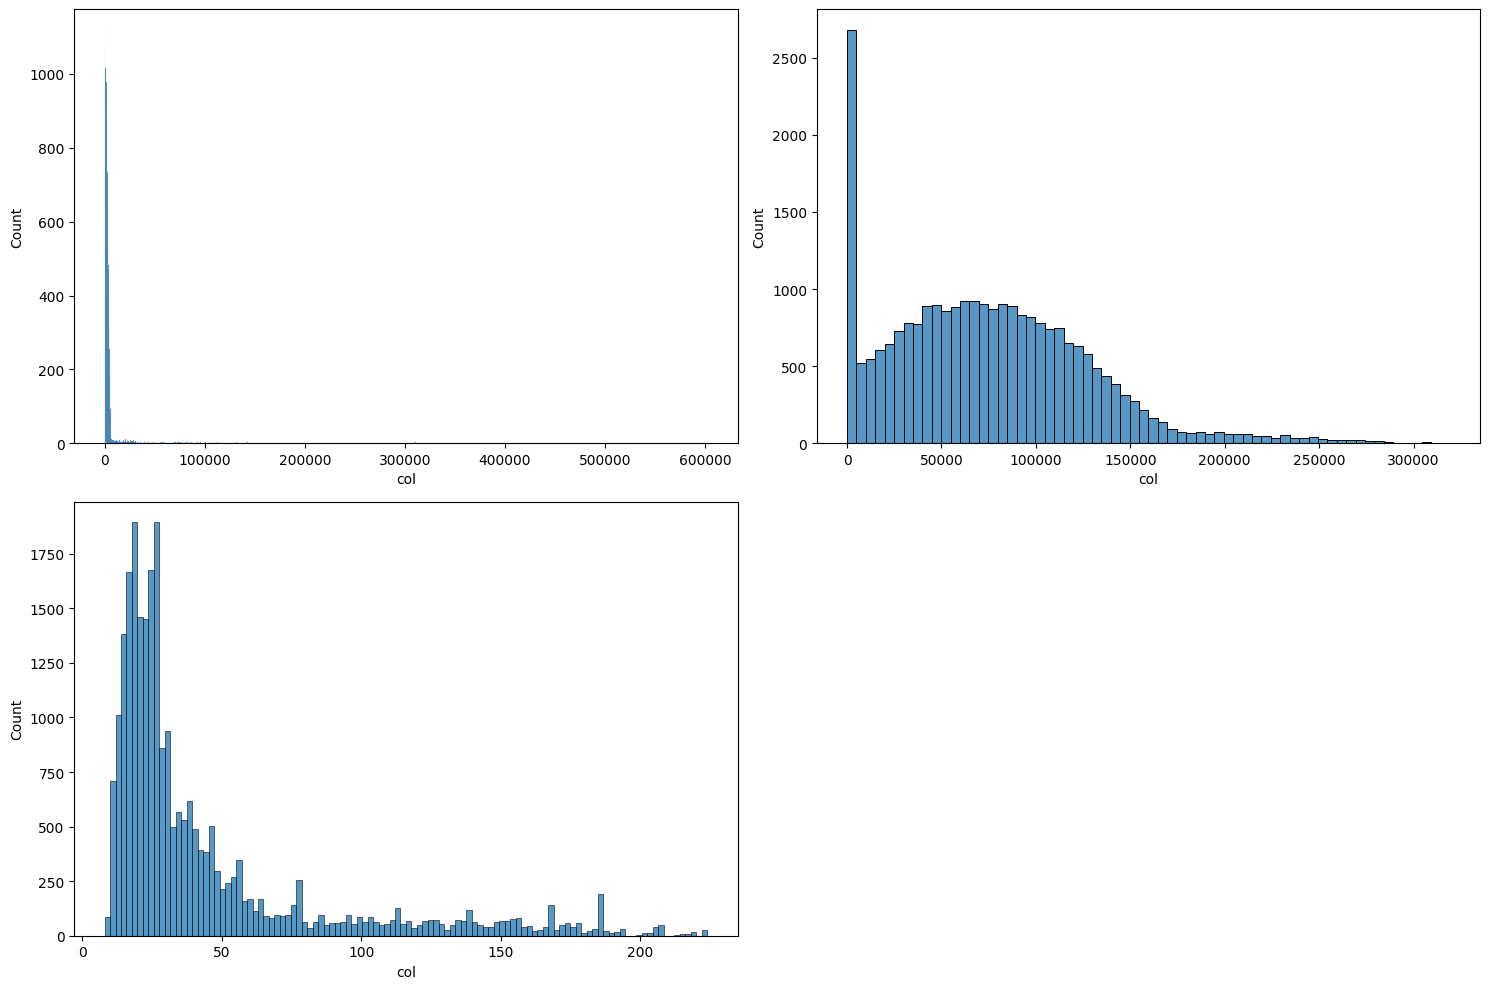

In [17]:
## Distribution of data before scaling
plt.figure(figsize=(15,10))
for i ,col in enumerate(['no_of_employees','prevailing_wage','company_age']):
    plt.subplot(2,2,i+1)
    sns.histplot(x=X[col])
    plt.xlabel('col')
    plt.tight_layout()

* No of employees and Copmany age column is skewed
* Apply a power transform featurewise to make data more Gaussian-like.

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

Currently, PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform.

**Checking Skewness**

**What is Skewness ?**

* Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed. Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. A normal distribution has a skew of zero

## Check Skewness

**What is Skewness ?**

* Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed. Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. A normal distribution has a skew of zero

In [18]:
X[continuous_features].skew(axis=0,skipna=True)

no_of_employees    12.265260
prevailing_wage     0.755776
company_age         2.037301
dtype: float64

- Positiviely Skewed : company_age, no_of_employees.
- We can handle outliers and then check the skewness.

## Apply Power Transformer to Check if it can reduces the outliers

In [19]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
transform_columns=['no_of_employees','company_age']
X_copy=pt.fit_transform(X[transform_columns])

In [20]:
X_copy=pd.DataFrame(data=X_copy,columns=transform_columns)

In [21]:
X_copy.head()

,no_of_employees,company_age
0,1.517300,-0.952162
1,0.030912,-0.462942
2,2.885076,-1.075820
3,-1.343550,1.629178
4,-0.432287,-0.733953


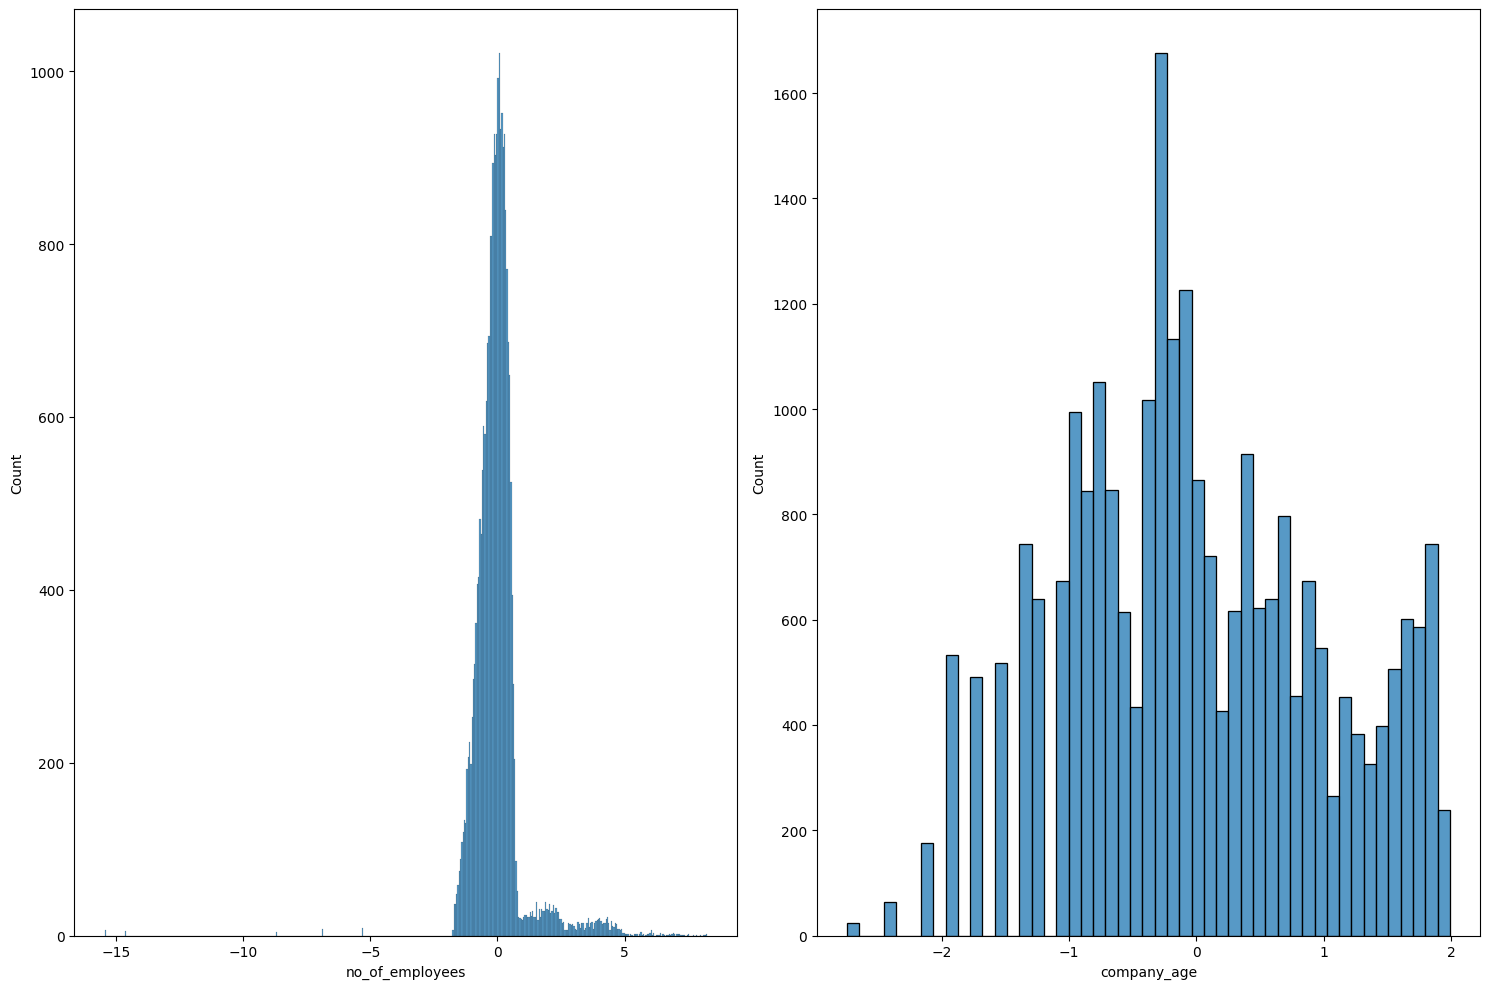

In [22]:
plt.figure(figsize=(15,10))
for i,col in enumerate(X_copy):
    plt.subplot(1,2,i+1)
    sns.histplot(x=X_copy[col])
    plt.xlabel(col)
    plt.tight_layout()


**Checking skewnes**

In [23]:
X_copy.skew(axis=0,skipna=True)

no_of_employees    0.399339
company_age        0.103264
dtype: float64

In [24]:
for features in cat_features:
    print(features, ":" ,df[features].nunique())

case_id : 25480
continent : 6
education_of_employee : 4
has_job_experience : 2
requires_job_training : 2
region_of_employment : 5
unit_of_wage : 4
full_time_position : 2
case_status : 2


In [25]:
cat_features.remove("case_id")

In [26]:
num_features=list(X.select_dtypes(exclude='object').columns)

In [27]:
## Preprocessing using column transformer

or_columns = ['has_job_experience','requires_job_training','full_time_position','education_of_employee']
oh_columns = ['continent','unit_of_wage','region_of_employment']
transform_columns= ['no_of_employees','company_age']


from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder,PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()
or_transformer=OrdinalEncoder()

transfrom_pipe=Pipeline(
    steps=[
        ('transfromer',PowerTransformer(method='yeo-johnson'))

    ]
)
preprocessor=ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer,oh_columns),
        ('OrdinalEncoder',or_transformer,or_columns),
        ('Transformer',transfrom_pipe,transform_columns),
        ('Standardscaler',numeric_transformer,num_features)


    ]
)


X = preprocessor.fit_transform(X)

In [29]:
X

array([[ 0.        ,  1.        ,  0.        , ...,  0.38666657,
        -1.39853722, -0.65122993],
       [ 0.        ,  1.        ,  0.        , ..., -0.14228155,
         0.1698353 , -0.53321103],
       [ 0.        ,  1.        ,  0.        , ...,  1.69498375,
         0.91907852, -0.6748337 ],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.19871259,
         1.36027953,  1.63833662],
       [ 0.        ,  1.        ,  0.        , ..., -0.16387483,
         0.22150859,  2.18122353],
       [ 0.        ,  1.        ,  0.        , ..., -0.10805575,
        -0.06776315,  0.45814768]])

## Classifiacation

In [31]:
from imblearn.combine import SMOTETomek, SMOTEENN

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTEENN(random_state=42,sampling_strategy='minority' )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X, y)

# Train Test Split
- The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

- It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms.

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2,random_state=42)
X_train.shape,y_train.shape

((13638, 24), (13638,))

In [35]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,\
                                precision_score,recall_score,f1_score,roc_auc_score,roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier



In [36]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc
    

In [37]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()

}

In [42]:
list(models.keys())[1]

'Decision Tree'

In [43]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    auc= []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report

In [44]:
base_model_report =evaluate_models(X=X_res, y=y_res, models=models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9548
- F1 score: 0.9585
- Precision: 0.9549
- Recall: 0.9621
- Roc Auc Score: 0.9542


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9296
- F1 score: 0.9353
- Precision: 0.9328
- Recall: 0.9378
- Roc Auc Score: 0.9289


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8822
- F1 score: 0.8903
- Precision: 0.8945
- Recall: 0.8862
- Roc Auc Score: 0.8819
----------------------------------
Model performance for Test set
- Accuracy: 0.8956
- F1 score: 0.9031
- Precision: 0.9095
- Recall: 0.8967
- Roc Auc Score: 0.8955


Logistic Regression
Model performance for Training 

In [45]:
base_model_report

,Model Name,Accuracy
0,Random Forest,0.954839
4,K-Neighbors Classifier,0.940176
5,XGBClassifier,0.935191
1,Decision Tree,0.929619
6,CatBoosting Classifier,0.929619
2,Gradient Boosting,0.895601
7,Support Vector Classifier,0.870088
8,AdaBoost Classifier,0.868328
3,Logistic Regression,0.744868


## Here we can use Random Forest for Huper Parameter Tunnining

In [47]:
## intialize few parameter for hyper parameter tunning
xgboost_params={
    "max_depth":range(3,10,2),
    "min_child_weight":range(1,62)
}
rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]
}

knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree','brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9],
}

In [52]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ('XGBoost', XGBClassifier(), xgboost_params),
    ("RF", RandomForestClassifier(), rf_params),
    ("KNN", KNeighborsClassifier(), knn_params)
]

## Create function for model training and report which can be used for hyperparameter tunining

In [53]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2, 
                                   n_jobs=-1)
    random.fit(X_res, y_res)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Fitting 3 folds for each of 40 candidates, totalling 120 fits
---------------- Best Params for XGBoost -------------------
{'min_child_weight': 2, 'max_depth': 9}
---------------- Best Params for RF -------------------
{'n_estimators': 200, 'max_features': 'log2', 'max_depth': None}
---------------- Best Params for KNN -------------------
{'weights': 'distance', 'n_neighbors': 4, 'algorithm': 'auto'}


In [54]:
model_param

{'XGBoost': {'min_child_weight': 2, 'max_depth': 9},
 'RF': {'n_estimators': 200, 'max_features': 'log2', 'max_depth': None},
 'KNN': {'weights': 'distance', 'n_neighbors': 4, 'algorithm': 'auto'}}

In [55]:
## Retrainig model with best models

In [58]:
from sklearn.metrics import roc_auc_score,roc_curve

best_models={
    'Rnadom Forest Classifier':RandomForestClassifier(**model_param['RF']),
    'KNeighbour Classifier':KNeighborsClassifier(**model_param['KNN']),
    'XBoostClassifier':XGBClassifier(**model_param['XGBoost'],n_jobs=-1)
}
tuned_report =evaluate_models(X=X_res, y=y_res, models=best_models)

Rnadom Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9557
- F1 score: 0.9593
- Precision: 0.9560
- Recall: 0.9627
- Roc Auc Score: 0.9551


KNeighbour Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9733
- F1 score: 0.9757
- Precision: 0.9651
- Recall: 0.9865
- Roc Auc Score: 0.9721


XBoostClassifier
Model performance for Training set
- Accuracy: 0.9985
- F1 score: 0.9986
- Precision: 0.9978
- Recall: 0.9993
- Roc Auc Score: 0.9984
----------------------------------
Model performance for Test set
- Accuracy: 0.9446
- F1 score: 0.9491
- Precision: 0.9448
- Recall: 0.9535
- Roc Auc Score: 0.9438




In [59]:
best_model = KNeighborsClassifier(**model_param['KNN'])
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'KNN'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'KNN'
Accuracy Score value: 0.9733
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1561
           1       0.97      0.99      0.98      1849

    accuracy                           0.97      3410
   macro avg       0.97      0.97      0.97      3410
weighted avg       0.97      0.97      0.97      3410



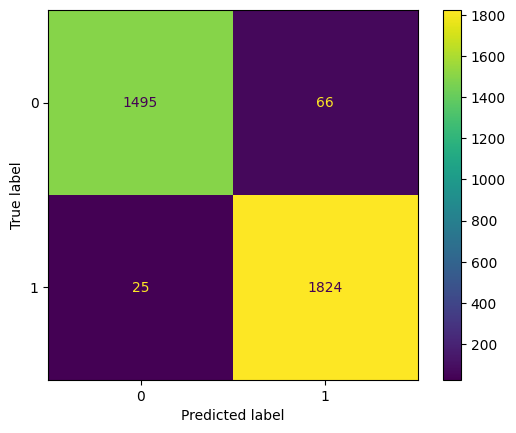

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

## Best Model is K-Nearest Neighbor(KNN) with Accuracy 96.66%